# Binomial Basics
This notebook is a record of how one gets from counting some things to systematically counting 'states'. 

In [1]:
from sympy import init_session
#To print all output in html.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
init_session()
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### Permutations of **n** items
$P(n) = n!$. This states that, if one takes an item (from a bag), $x_1$, one is left with $n - 1$ items. Take the next item, $x_2$ out, and there are $n - 2$ items left. Illustrate this with three items, ${a, b, c}$. If I chose a, I could choose either b or c. If I chose b, then the last choice is c. If I chose c, the last choice is b. Carry this process on and one ends up with a tree of choice pathways. The end results is that in choosing item 1, I have 3 options, 2 options for item 2 and 1 for item 3. So the total number of options in the tree is 3 x 2 x 1 = 3! 

In the general sense, this tells us that, if one has $n$ items, that the number of **permutations** $P(n) = n!$

Lets look at how to use this process with ```sympy```.

In [2]:
from sympy.functions.combinatorial.numbers import nC, nP, binomial, bernoulli, factorial
items = ['a','b','c']
#How many wasy can one choose all three of the items in the list? 
print('There are ',nP(items, 3),'ways to choose each item, to arrange the three items, 3 at a time.')

There are  6 ways to choose each item, to arrange the three items, 3 at a time.


But, what if one only wants to pick two items of a three item list at a time? This is asking how many ways can one pick $k$ items from a list of $n$ items? $P(n, k)$.

The answer to this question is, in my opinion, both elegant and fundamental to how to think about counting and combining (combinatorics). 

Imagine that one starts taking out items, until $k$ items are removed. What is left are $n - k$ items. But we know how to count how many ways one can arrange those items; it is $(n - k)!$. Simple. 

We still don't know what $P(n,k)$ evaluates to. But, we do know that $P(n) = P(n,k)\ P(n, n - k) = P(n,k) \ (n - k)!$ That is, the total combinations is a factorial of $n$; this leaves only one unknown algebraic term. If we solve for this using the other terms, we can derive $P(n,k)$ in terms of things we do know and can count more easily. 

Lets do some simple substitution: 
$$ P(n) = P(n,k) \ P(n, n - k)$$

$$ P(n) = n!$$

$$ P(n, n - k) = (n - k)!$$

$$ n! = P(n,k) \ (n - k)!$$

$$ P(n,k) = \frac{n!}{(n - k)!}$$

This is great; we now can find the number of ways items can be ordered when drawing from a pool of $n$ items.

In ```sympy.nP()``` this simply involves making $k \in n :  k \le n$. [sympy combinatorics](http://docs.sympy.org/latest/modules/functions/combinatorial.html#np)

In [3]:
items = ['a','b','c','d']
k = 2
nP(items, k)

This gets one to the most interesting part. This is where we can find and calculate the **binomial coefficient**. But first some preliminaries...

The phrase “combinations of $n$ distinct items taken $k$ at a time” means the ways in which $k$ of the $n$ items can be combined, regardless of order. (from [source](http://www.zipcon.net/~swhite/docs/math/probability/counting.html))

So rather than considering the orders in which items are chosen, as with permutations, the combinations consider which **sets** of items are chosen.

The combinations of $n$ distinct items taken $k$ at a time is mainly written ${n}\choose{k}$.

Separate the issue of the **order** in which the items are chosen from the issue of **which** items are chosen, as follows. From before, the number permutations of $k$ items taken from $n$ items is:

        (number sets of k items taken from n ) × ( number of ways to order the k items )

$$P(n,k) = {{n}\choose{k}} \ P(k,k)$$

Rearrange this a little, as we actually know all the terms, apart from ${n}\choose{k}$.

$${{n}\choose{k}} = \frac{P(n,k)}{P(k,k)}$$

$${{n}\choose{k}} = \frac{n!}{k!(n - k)!}$$

Lets test this in ```sympy```.

In [4]:
binomial(4,k)

In [5]:
#Does this derivation work out when we compare it to the sympy...binomial function?
binomial(4,k) == nP(4,k)/nP(k,k)

True

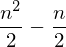

In [111]:
#Digging slightly deeper, one can expose the expressions used to calculate elements.
num_items = Symbol('n',positive=True, integer=True)
binomial(num_items,k).expand(func=True)

The only issue with this approach, symbolic as it is, is that it just is hard to calculate out for anything large. In part, this arises from the need and cost of computing factorials. ```sympy``` does allow a Stirling approximation, but this is just a computational expedient. 

One could derive a symbolic result and then use lambdify or theanofunction to apply this numerically. Again, this would work quite well, but is cumbersome. 

### Creating actual samples from a distribution using sympy

The [sympy.stats](http://docs.sympy.org/latest/modules/stats.html) documentation provides examples how to generate distributions from a symbolic object (distribution). 

In [7]:
from sympy.stats import *

In [58]:
n = 5
p=0.5
BinRV = Binomial("BinRV",n,p)
#We've created an object and now can inspect it's density, for example.
density(BinRV).dict

There are a number of other expressions that operate on the RV object. 
Queries on random expressions can be made using the functions

|Expression | Meaning
|--- | ----- |
|P(condition)| Probability
|E(expression)| Expected value
|variance(expression)| Variance
|density(expression) | Probability Density Function
|sample(expression)| Produce a realization
|where(condition)| Where the condition is true

In [59]:
#Wat is the probability that our RV has more than 2 successes out of the 5 draws?
P(BinRV>2)

In [60]:
#What is the EV,  or mean value and variance?
E(BinRV), variance(BinRV)

In [61]:
for i in range(5):
    sample(BinRV)

In [62]:
where(BinRV < 3).set

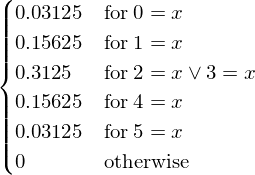

In [63]:
density(BinRV)(x)

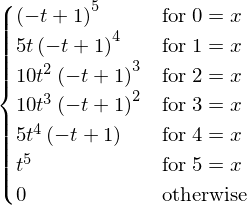

In [87]:
#You can create an expression for any probability of your RV when one has sampled n times. 
num = 5
prob = t
D = Binomial('D', num, prob)
density(D)(x)

In [73]:
#Check that the probability from the expression == density estimate.
Eq(t**5).lhs.subs(t,.5) == .5**5

True

In [75]:
expand(Eq(5*t*(1-t)**4))

### Pascal's triangle and the Binomial coefficient

Lets go back to a very basic algorithm used to construct Pascal's triangle. Let $n$ be the row number; let $k$ be the column number. The algorithm is: 

$$ {{n}\choose{k}} = {{n - 1}\choose{k - 1}} + {{n - 1}\choose{k}}$$

Apply this algorithm and we get: 

$$1$$
$$1 \ 1 $$
$$1 \ 2 \ 1 $$
$$1 \ 3 \ 3 \ 1 $$
$$1 \ 4 \ 6 \ 4 \ 1 $$
$$1 \ 5 \ 10 \ 10 \ 5 \ 1 $$

In [76]:
#One pythonic approach to generate a list of binomial coefficients. 
for i in range(6):
    [binomial(i,k) for k in range(6)]

These are coefficients in the same sense of any coefficient which multiplies a variable $x^n$. 
In ```sympy``` it is not difficult to create an equation for however many coefficients one desires. The basic equation, the binomial equation, is expanded out with $n$ representing the row again. 

$$ Binomial = (1 + x)^n$$

In [77]:
#These are the coefficients for the expansion of 
for i in range(6):
    expand((1+x)**i)

Another property of the binomial coefficients is derived from setting $ x = 1$ and rewriting the equation:
$$(1 + x)^n\Big|_{x = 1} = \sum_{k=0}^{n} {{n}\choose{k}} x^n\Big|_{x = 1}$$

Let $ x = 1$, giving:

$$\Rightarrow (1 + 1)^n = \sum_{k=0}^{n} {{n}\choose{k}} 1^n$$
$$\Rightarrow 2^n = \sum_{k=0}^{n} {{n}\choose{k}}$$

There are a number of other, quite surprising, properties of binomial coefficients and Pascal's triangle, [see for example](http://www.cs.columbia.edu/~cs4205/files/CM4.pdf)

### Numeric methods of finding the binomial coefficients
As noted before, whilst ```sympy``` is very useful algebraically, it may not be the most computationally efficient option. The following introduces the ```scipy.stats``` algorithm. Within that package, there is a [constructor](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) to allow creation of binomial distributions.

In [78]:
from scipy.stats import binom
#For a single coin-toss for heads = 1 we get...
n, p = 1, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
#These are not normalised, so need to be dividded by n to attain this...
mean, var

(array(0.5), array(0.25))

Usually, for practical purposes, you will want a 'frozen' distribution (a list of samples). This is achieved as follows (you  can read the docs for other options).

In [79]:
#Lets do n = 10 Bernoulli trials with probability p = .5
n =5
p = 0.5

In [80]:
#Some basic elements of the functions... first the percent point function.
#This shows the range of outcomes from 1% to 99%
binom.ppf(.01,n,p),binom.ppf(.99,n,p)

In [81]:
bin_dist = binom(n,p) #Creates a frozen object which fixes shape and location. 
#Pick some x-values for which we want a distribution
X = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
X, bin_dist.pmf(X)

(array([0., 1., 2., 3., 4.]),
 array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625]))

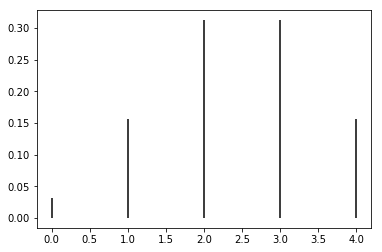

In [82]:
#I personally don't find this method of gaining a pmf overly clear. But, it
# allows one to create an object and then plot a pmf for each of the created x-values.
plt.vlines(X,0,bin_dist.pmf(X))

(array([2, 5, 4, 2, 2, 2, 2, 2, 3, 2]),
 (array([0.0308, 0.1559, 0.3086, 0.3162, 0.1574, 0.0311]),
  array([0, 1, 2, 3, 4, 5, 6]),
  <a list of 6 Patch objects>))

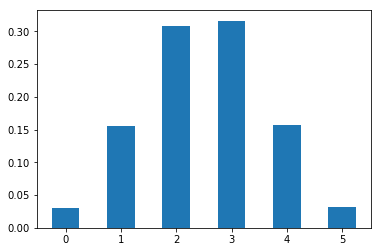

In [83]:
#An alternative way is to create a set of random variables and then plot these
#as a histogram. 
RV = binom.rvs(n,p,size=10000)
RV[:10], plt.hist(RV,
                  bins=[0,1,2,3,4,5,6],#Setting bin range is just tider...
                  align='left',#puts the bars onto the value
                  rwidth=.5,
                  normed=True) #Presents the hist so the sum of bars = 1

In [84]:
#what about the stats for the distribution we have sampled?
print('Mean: ',RV.mean(), 'Standard Deviation: ',RV.var())

Mean:  2.5068 Standard Deviation:  1.2479537600000001


In [85]:
#How does this compare to the first method of constructing a distribution?
size=10000
mean, var, skew, kurt = binom.stats(size, p, moments='mvsk')
n,p,mean/size, var/size

### Using Bayesian modelling to estimate parameters from a set of samples

While it is great to be able to generate distributions, and to model them, mostly in applied settings one usually has a set of data from counting successes (or failures) from which the goal is to estimate the probability of a *single* success.The approach above is to find the mean, var etc using expected value formulae. However, it is important to recall that these formulae are for distributions in the limit. That is not what one ever has in terms of data, typically. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████▉| 10491/10500 [00:07<00:00, 1395.13it/s]/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.906695320039659, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 10500/10500 [00:07<00:00, 1394.35it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131706048>,
      dtype=object)

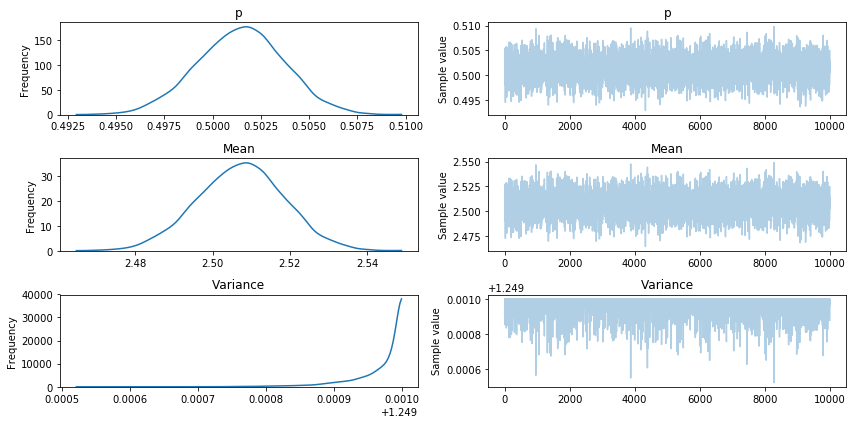

In [129]:
import pymc3 as pm
model = pm.Model()

with model:
    p = pm.Beta( 'p', alpha=2, beta=2 )
    #Lets also estimate the mean and variance. 
    mean = pm.Deterministic('Mean', n*p)
    variance = pm.Deterministic('Variance', n*p*(1-p))
    y_obs = pm.Binomial( 'y_obs', p=p, n=n, observed=RV )
    trace = pm.sample( 10000, progressbar=True )

pm.traceplot( trace )

In [130]:
pm.summary(trace)


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.501            0.002            0.000            [0.497, 0.506]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.497          0.500          0.501          0.503          0.506


Mean:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.507            0.011            0.000            [2.483, 2.528]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.485          2.500          2.507          2.515          2.529


Variance:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

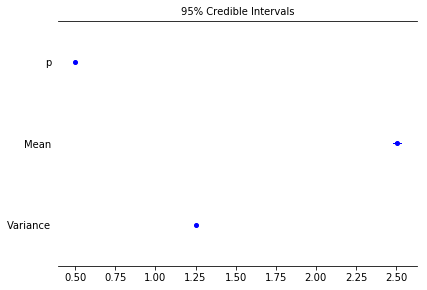

In [131]:
pm.forestplot(trace)

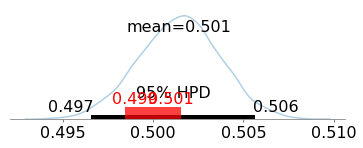

In [132]:
pm.plot_posterior(trace['p'], kde_plot=True, rope=[0.499, .501])

100%|██████████| 100/100 [00:00<00:00, 1800.25it/s]


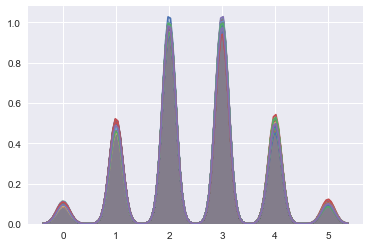

In [149]:
import seaborn as sns
sns.set(style="darkgrid")
y_samp = pm.sample_ppc(trace, 100, model, size=len(RV))
for i in y_samp['y_obs']:
    sns.kdeplot(i,shade=True)